In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Building an image classifier

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.7.0'

In [4]:
tf.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


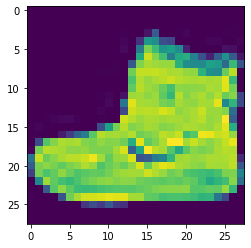

In [8]:
plt.imshow(X_train_full[0])

In [9]:
y_train_full[0]

9

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_full[1]]

'T-shirt/top'

In [12]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data normalization

In [15]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#### Splitting data
* Training data - used for training the model
* Validation data - used for tuning the hyperparameters and evaluate the models
* Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [16]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Building the neural network
[28*28 pixel] > [Input layer (ReLu Activation)] > [Hidden layer 1] > [Hidden layer 2] > [Output layer (Softmax Activation)] > [10 categories] 

In [17]:
# Setting random seeds to 42
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


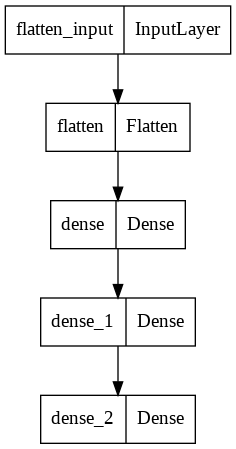

In [20]:
import pydot
keras.utils.plot_model(model)

In [21]:
# accesing the parameters
weights, biases = model.layers[1].get_weights()

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)